# 🐕End to End Multi class Dog Breed Classification
This notebook builds an end to end multi image classifier using Tensorflow Hub

## 1. Problem
 Identifying the breed of the bog given an image of a dog.
## 2. Data
 The data is from kaggle

## 3. Evaluation
 The evaluation  of pro.
## 4. Features
 unstructure data

In [2]:
import tensorflow as tf
print(f"tensorflow version {tf.__version__}" )

tensorflow version 2.19.0


In [3]:
import tensorflow_hub as hub
print(f"tensorflow_hub version {hub.__version__}" )

# Check for GPU available
print("GpU","Ava (yesss)" if tf.config.list_physical_devices("GPU") else "No")

tensorflow_hub version 0.16.1
GpU Ava (yesss)


## Getting our data ready
converting images to numerical form

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
Axes(0.125,0.11;0.775x0.77)


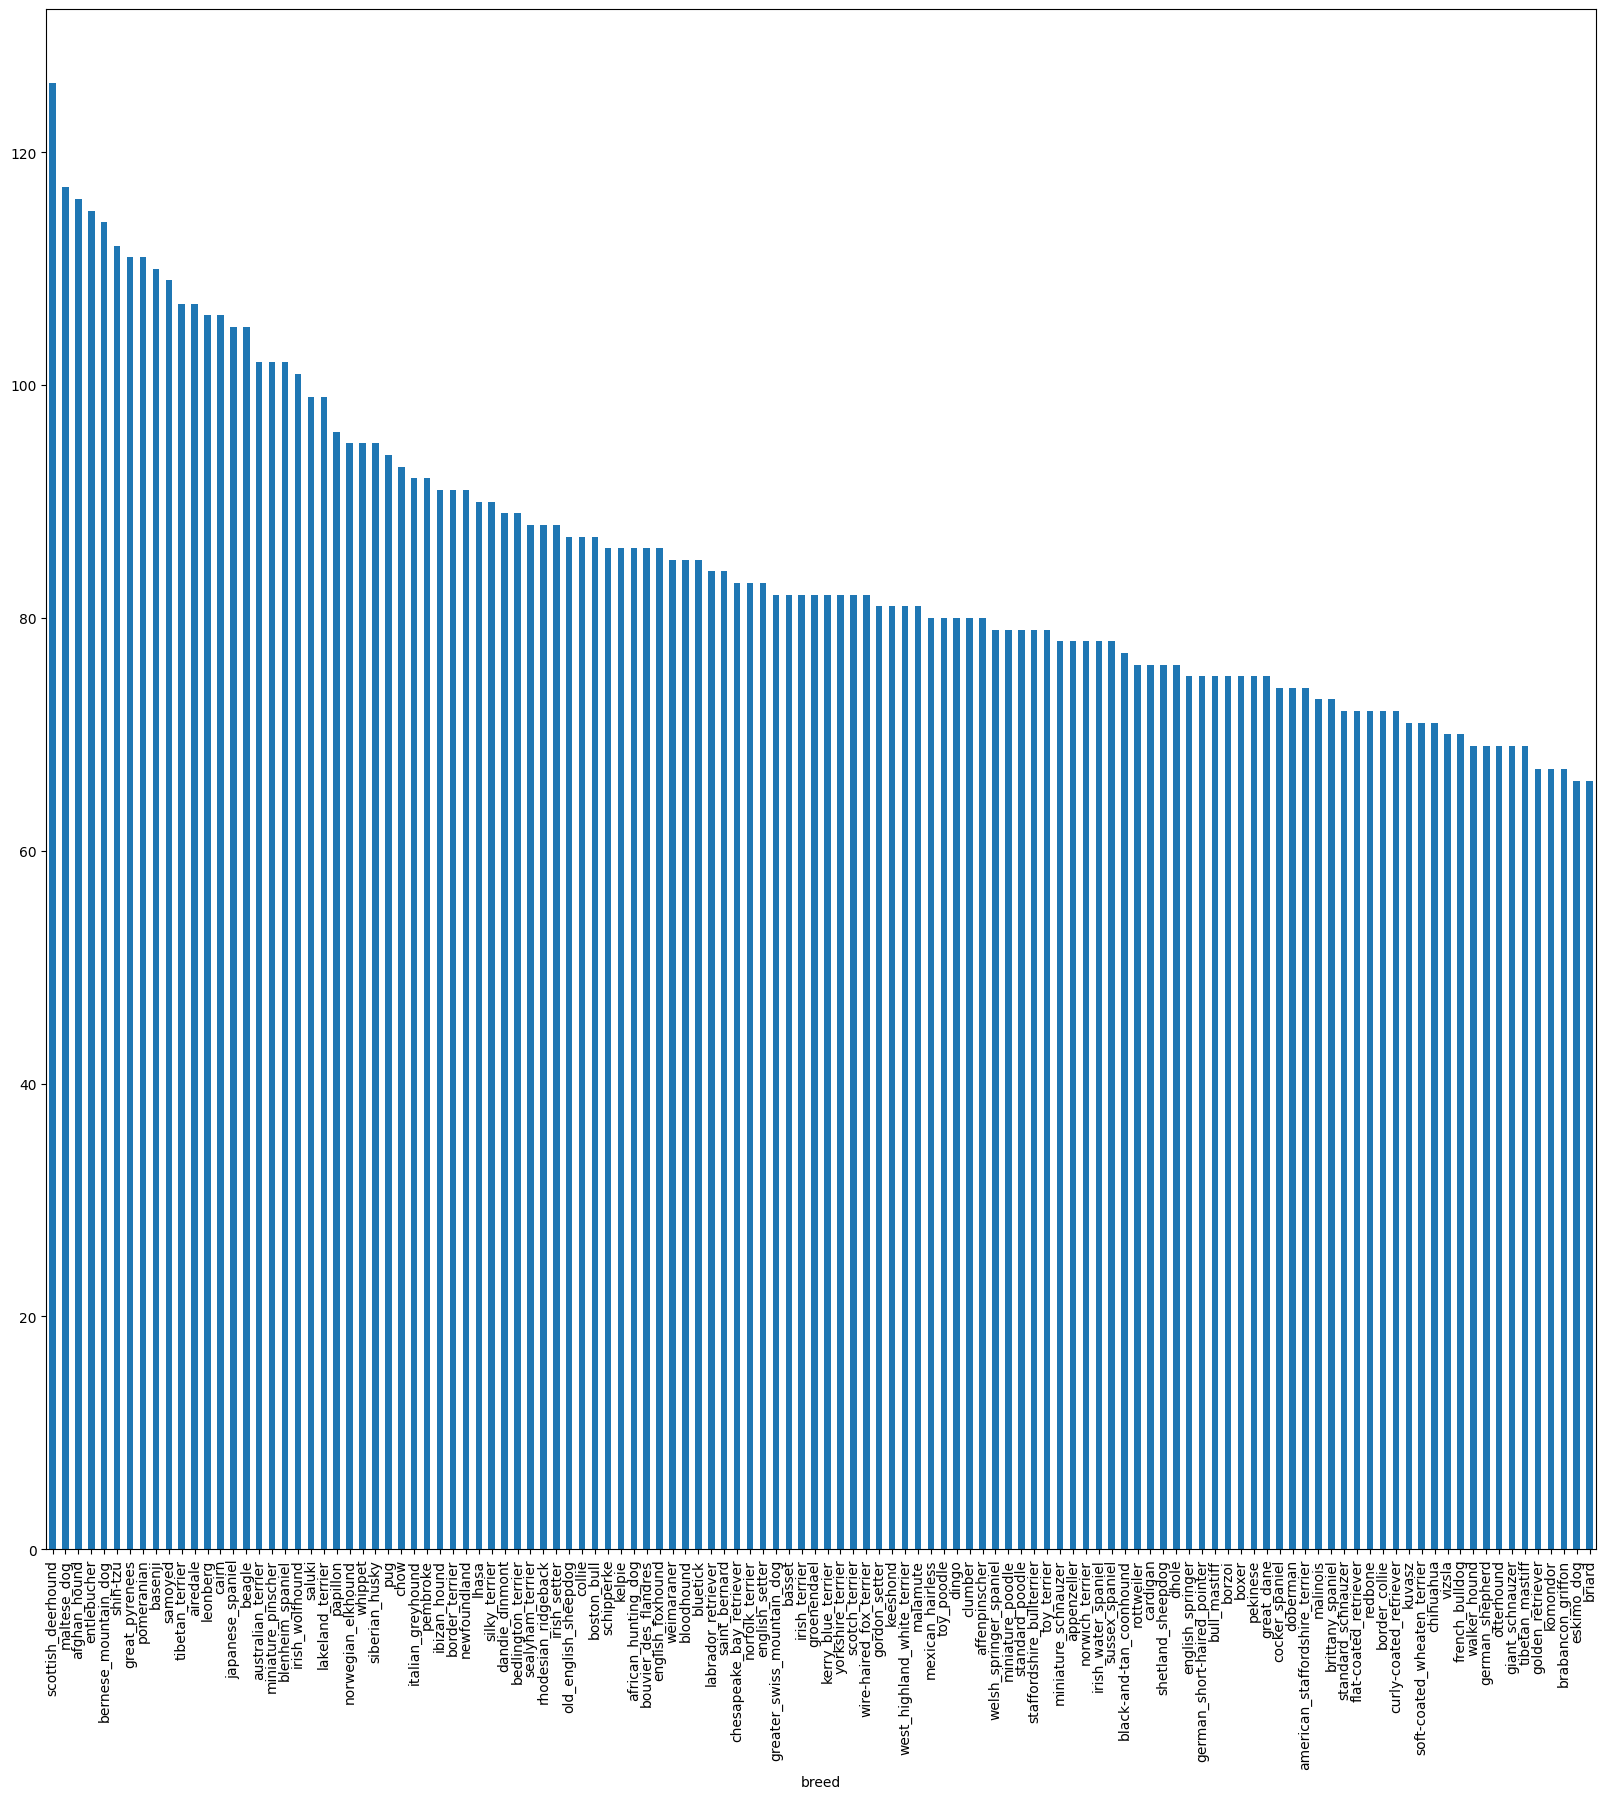

In [4]:
# Checking the labels
import pandas as pd
lables_csv=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/labels.csv")
print(lables_csv.head())
print(lables_csv.describe())
print(lables_csv['breed'].value_counts().plot.bar(figsize=(20,20)))

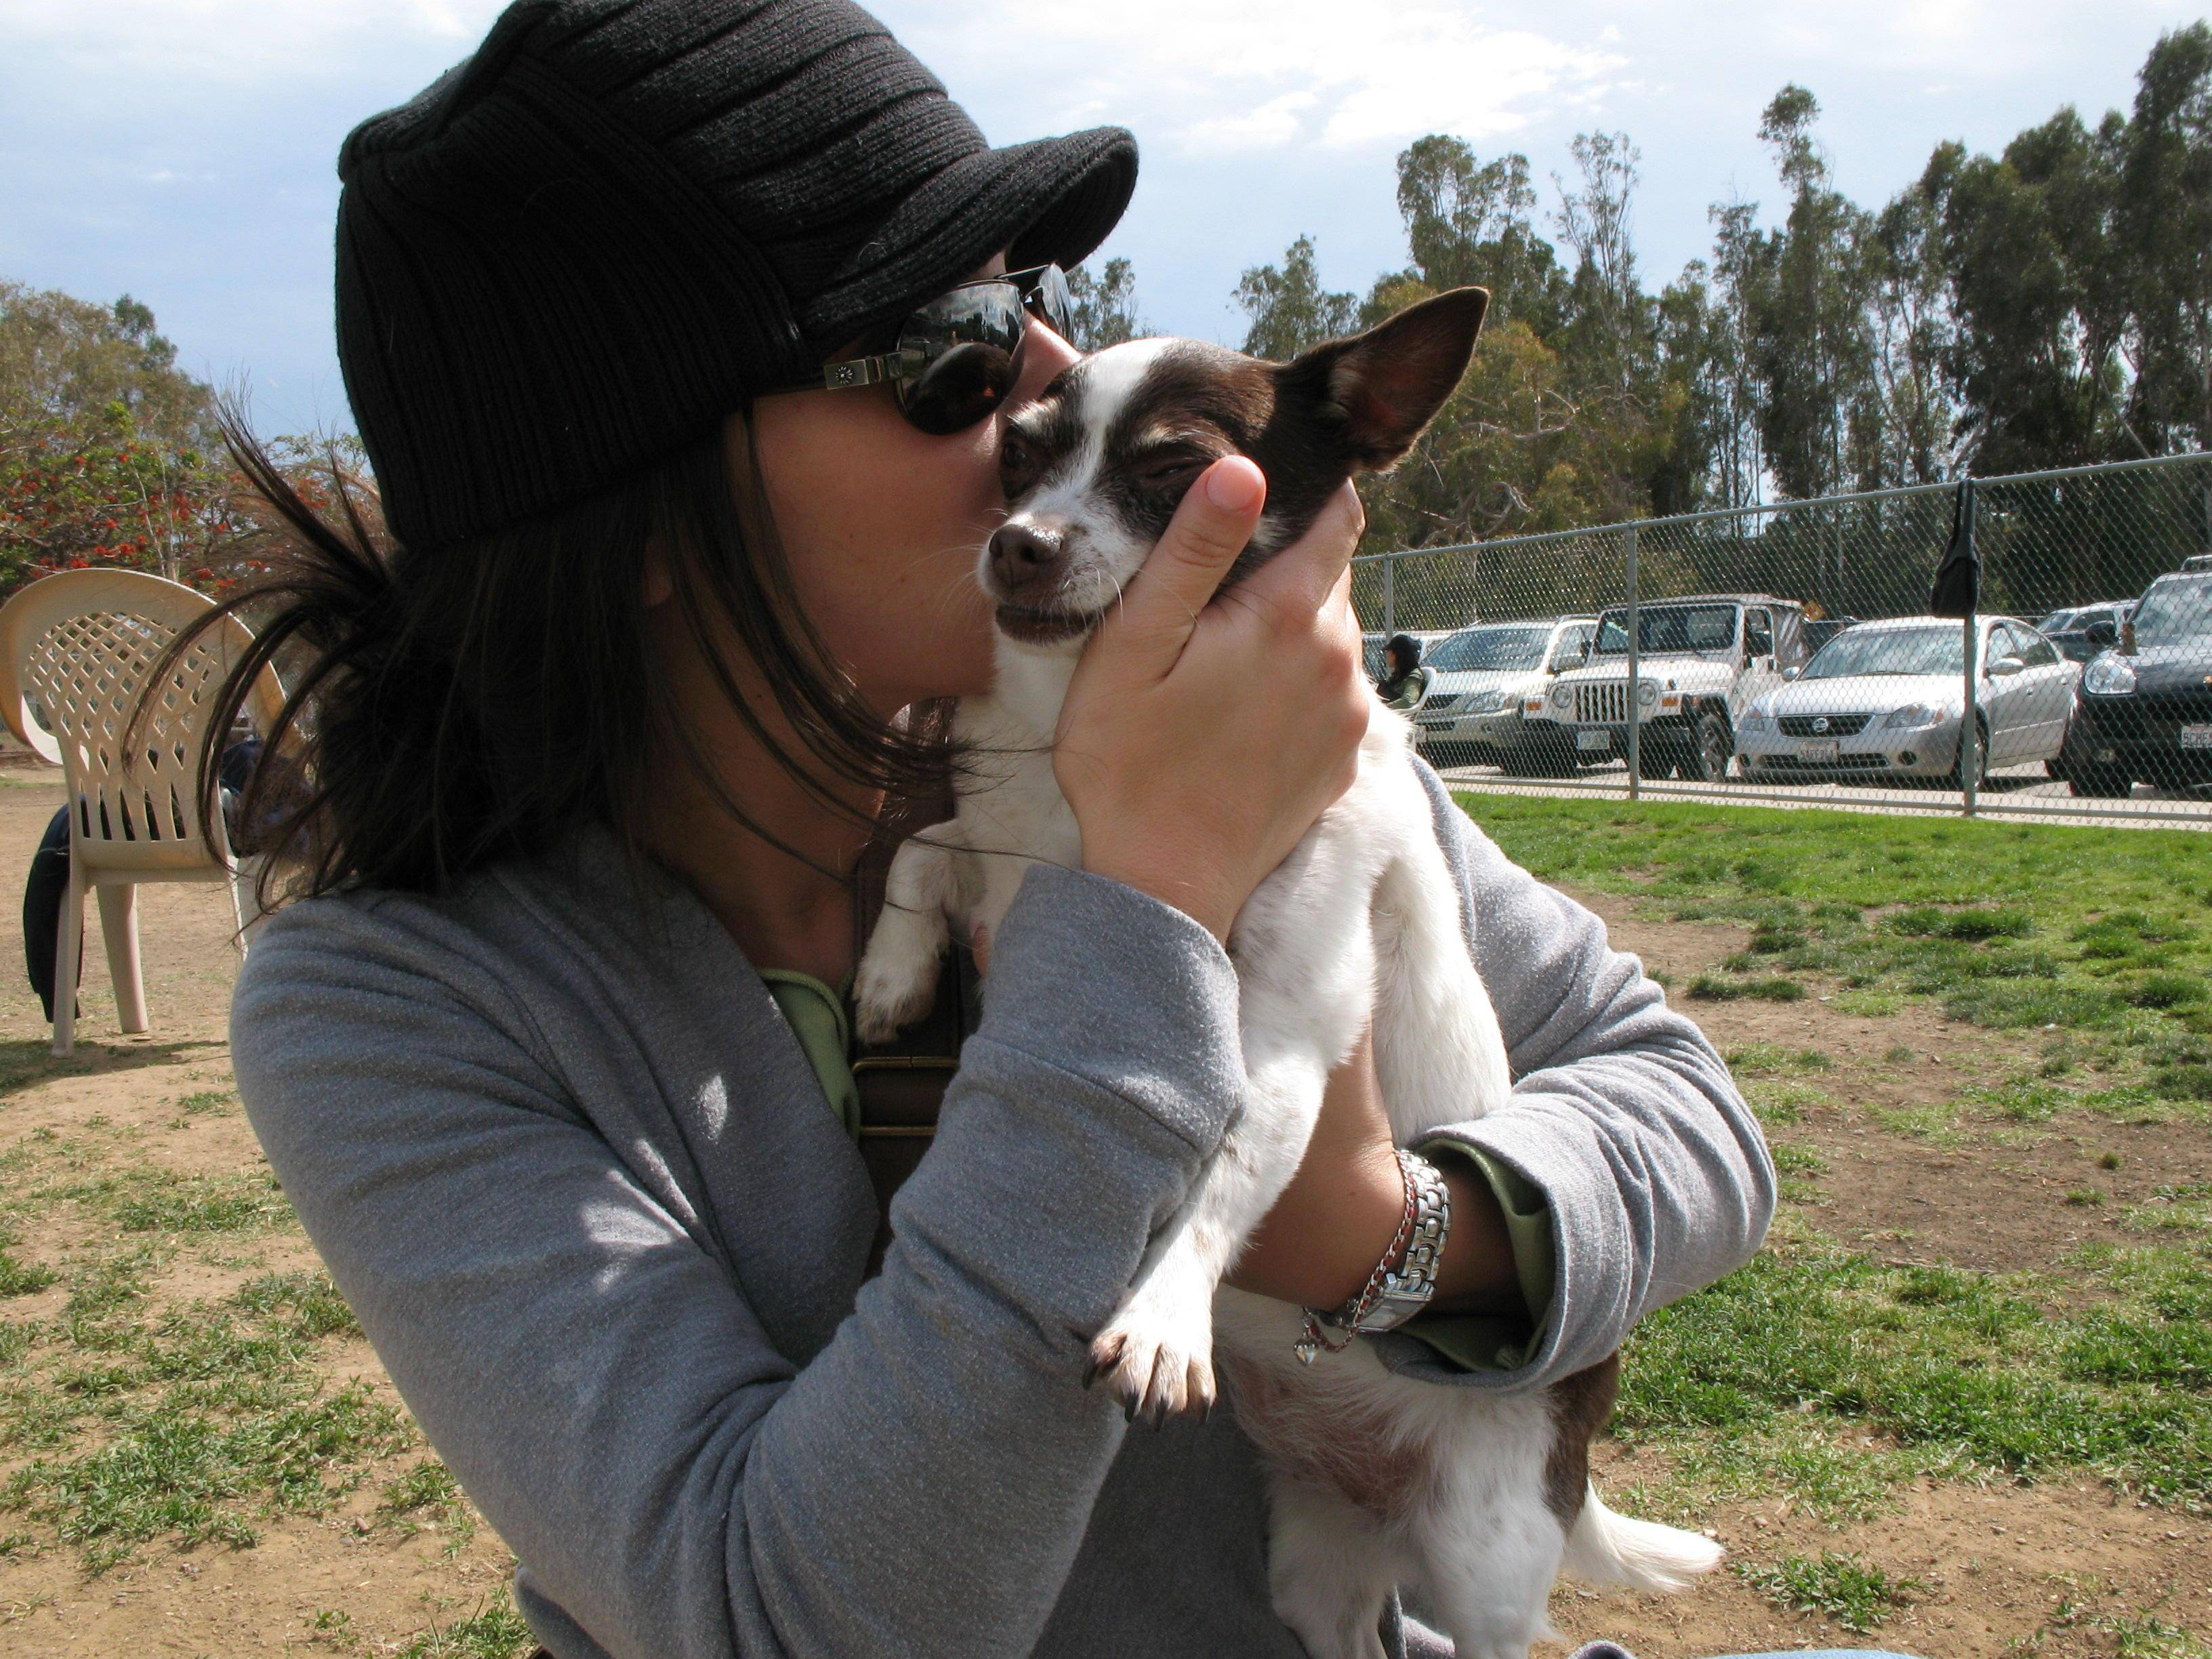

In [5]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/bf6cf509b2ee89fcc7f1b627ee1ed7e7.jpg")

In [6]:

# Creating path names from image id
filenames=["/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/"+fname+'.jpg' for fname in lables_csv['id']]

print(filenames[:10])

['/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/000bec180eb18c7604dcecc8fe0dba07.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/001cdf01b096e06d78e9e5112d419397.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/00214f311d5d2247d5dfe4fe24b2303d.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/0021f9ceb3235effd7fcde7f7538ed62.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/002211c81b498ef88e1b40b9abf84e1d.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/00290d3e1fdd27226ba27a8ce248ce85.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/002a283a315af96eaea0e28e7163b21b.jpg', '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/

In [7]:
import os
os.listdir("/content/drive/My Drive/Colab Notebooks/dog-breed-identification/train/train/")
label=lables_csv['breed']

In [8]:
# check whether number of filenames matches number of actual image files
import os
if len(label)== len(filenames):
  print("Filenames matches actual files")
else:
  print("Filenames do not match actual files")

Filenames matches actual files


In [9]:
import numpy as np
# Find the Unique label values
unique_breeds=np.unique(label)
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [10]:
boolean_labels=[lab == unique_breeds for lab in label]
boolean_labels[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [11]:
labels=lables_csv["breed"]
labels[:10]

,breed
0,boston_bull
1,dingo
2,pekinese
3,bluetick
4,golden_retriever
5,bedlington_terrier
6,bedlington_terrier
7,borzoi
8,basenji
9,scottish_deerhound


In [12]:
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/dog-breed-identificatio

### Creating our own validation set
Create our own validation

In [13]:
x=filenames
y=boolean_labels

In [14]:
# set number of images to use for exprimenting
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [15]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train[:10],y_train[:10]

(['/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/ad019e394b55406f412b9a03899d5705.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/c77266278126119fe02a3550dd0c3c1c.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/ffe5f6d8e2bff356e9482a80a6e29aac.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/75dbdbf6814e6c72a7cab75c73a5acd7.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/16fdb4a145a7f5695a264ba980e23bc3.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/cc964d3bf1e317c9fbb0c0d4c8bc6b8f.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/3a1eeae505c9fedcfd97d3eaa94c3c66.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/train/train/728b6f85d37f74e5f5c4a477103da84f.jpg',
  '/content/drive/MyDrive/Colab Notebooks/dog-breed-iden

## Preprocessing images images into Tensors

In [17]:
# Convert an image into numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
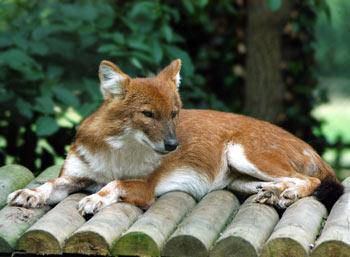

In [18]:
image

In [19]:
tf.constant(image)


<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [20]:
# Define image size
IMG_SIZE=224

#Create a function for preprocessing images
def process_images(image_path,img_size=IMG_SIZE):
    '''
    Takes an image file path and turns it into a Tensor.
    '''
    image=tf.io.read_file(image_path)

    # Turn the image into numeriacal Tensor with 3 color channels(rgb)
    image=tf.image.decode_jpeg(image, channels=3)
    #Convert the color channels values  from 0-255 to 0-1 values
    image =tf.image.convert_image_dtype(image,tf.float32)
    #Resize the image to our desired value (224,224)
    image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

    return image



In [21]:
# Turning our data into batches
#Create a simple function to return a tuple (image, label)
def get_image_label(image_path,label):
    return process_images(image_path),label

In [22]:
process_images(x[420]),tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.4114683 , 0.41538987, 0.4859781 ],
         [0.44199723, 0.4459188 , 0.516507  ],
         [0.4081373 , 0.41205886, 0.4826471 ],
         ...,
         [0.9275762 , 0.8758418 , 0.6837427 ],
         [0.8310161 , 0.8008341 , 0.65864295],
         [0.81935817, 0.7958287 , 0.6641239 ]],
 
        [[0.4333719 , 0.43729347, 0.5078817 ],
         [0.40215158, 0.40607315, 0.47666138],
         [0.41530982, 0.41923138, 0.48981962],
         ...,
         [0.85808146, 0.8156323 , 0.63144284],
         [0.82349676, 0.7882464 , 0.65984344],
         [0.8007286 , 0.7654782 , 0.6484687 ]],
 
        [[0.45188203, 0.4584909 , 0.5210172 ],
         [0.38182777, 0.38843668, 0.45096293],
         [0.4013801 , 0.407989  , 0.47051525],
         ...,
         [0.8913929 , 0.8699759 , 0.60206646],
         [0.9273041 , 0.9008983 , 0.722684  ],
         [0.9233313 , 0.8946461 , 0.72659636]],
 
        ...,
 
        [[0.9960785 , 0.9960785 

In [23]:
BATCH_SIZE=12

def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  # if a data is test
  if test_data:
    print("creating test data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepaths(no labels)
    data_batch=data.map(process_images).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("creating validation data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches.....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE) # Use get_image_label here
    return data_batch # Return the data batch

In [24]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val)

Creating training data batches.....
Creating training data batches.....


In [25]:
# Check otu the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data Batchs

In [26]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  #Setup
  plt.figure(figsize=(10,10))
  #Loop through 25 images
  for i in range(12):
    ax=plt.subplot(4,3,i+1)
    #display
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

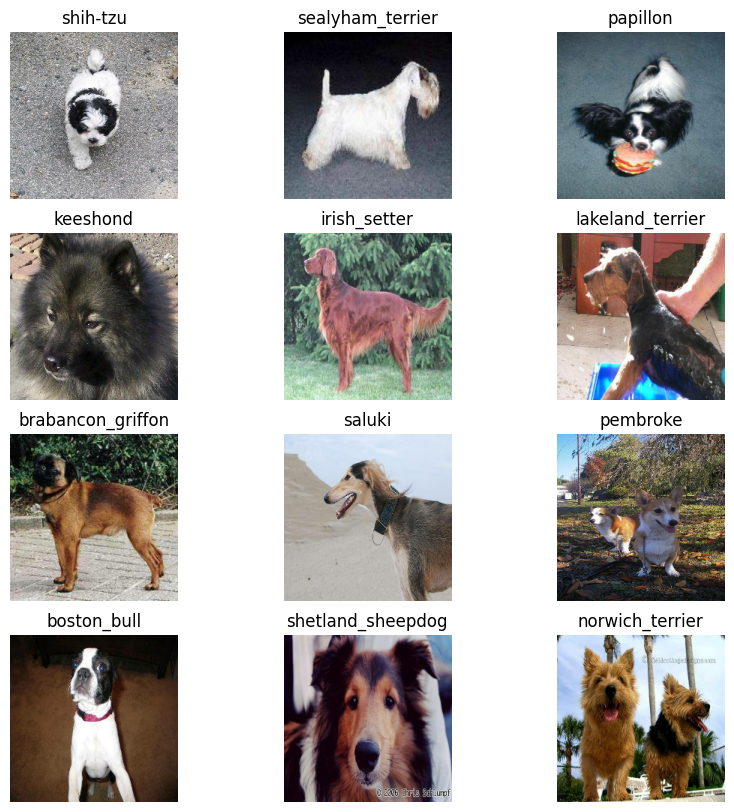

In [27]:
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

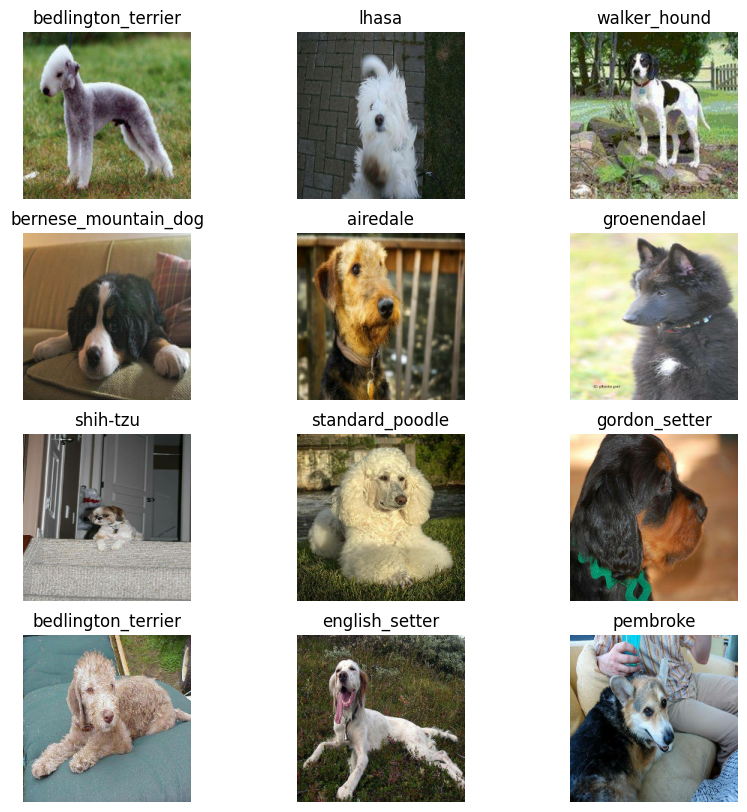

In [28]:
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model


In [29]:
#Setup input shape to the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]#BATCH ,height ,weight and color channels

# output shape
OUTPUT_SHAPE=len(unique_breeds)

#SETUP MODEL URL FROM TENSORFLOW HUB
MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'


put them together into keras deep learning model.

In [30]:
import tensorflow as tf
import tensorflow_hub as hub

# Solution 1: Using Lambda layer wrapper (Most compatible)
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Solution: Use Input layer first, then Lambda layer (fixes the warning)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape[1:]),  # Explicit Input layer
        tf.keras.layers.Lambda(lambda x: hub.KerasLayer(model_url, trainable=False)(x)),
        tf.keras.layers.Dense(units=output_shape, activation="softmax")
    ])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model


# Create and test the model
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       120,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │       120,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

# Verify the hub layer can be created
hub_layer = hub.KerasLayer(MODEL_URL)
print("Hub layer created successfully:", type(hub_layer))

TensorFlow version: 2.19.0
TensorFlow Hub version: 0.16.1
Hub layer created successfully: <class 'tensorflow_hub.keras_layer.KerasLayer'>


## creating callbacks
Callbacks are helper functions a model can use during training to dosuch things as save its progress  or stop its progress early if a modle stops improving.

We'll create two callbackss one for TensorBoard which helps track our models progerss and another for early stopping

In [33]:
#Load TensorBoard notebook extention
%load_ext tensorboard


In [34]:
import datetime
import os # Import the os module

#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBorad logs
  logdir=os.path.join("drive/MyDrive/Colab Notebooks/dog-breed-identification/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1)

Early Stopping]


In [35]:
# Early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

## Training a model (on subset of data)

Our fist model is only going to train on 100 images to make sure everything is working.

In [36]:
NUM_EPOCS=5


In [37]:
# Build a model to train and return a trained model
def train_model():
  '''
  Trains a given model and returns the trained version.
  '''
  # Create a model
  model=create_model()

  #Create new Tensorflow session everything we train a model
  tensorboard=create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping]
            )
  return model


In [ ]:
model=train_model()



Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/5
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.5226 - loss: 2.1911

In [ ]:
import datetime
import os # Import the os module

#Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBorad logs
  logdir=os.path.join("drive/MyDrive/Colab Notebooks/dog-breed-identification/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1)

In [ ]:
try:
    import tensorflow.summary
    print("TensorBoard summary available")
except ModuleNotFoundError:
    print("Installing tensorboard...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorboard"])
    print("TensorBoard installed successfully")

**Question**: overfitting due to performance at the training is high but at at test or val i is low.

### Checking the TensorBoard logs.

The TensorBoard magic funcion ('%tensorboard') will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir "/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/logs/"


In [ ]:
# lOADTEST IMAGE file name
test_path="/content/drive/MyDrive/Colab Notebooks/dog-breed-identification/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]


In [ ]:
#create test data batch
test_data=create_data_batches(test_filenames,test_data=True)

In [ ]:
test_data

In [ ]:
test_predictions=model.predict(test_data)